# Seaborn (+Matplotlib)

Seaborn is a plotting library used for plotting charts, heatmaps and...
Though matplotlib can be used directly for plotting, Seaborn is a wrapper around matplotlib mostly used for simplifying the process of plotting.

## Installation

```bash
pip install matplotlib seaborn
```

## Usage

> **IMPORTANT NOTE:** There are many different types of charts supported by
> seaborn. Though, for the sake of simplicity we will only show you line plot.
>
> Most of the other plotting functions are similar and a list of them can be found
> in: [the following link](https://www.kaggle.com/code/themlphdstudent/cheat-sheet-seaborn-charts)


### Plotting from a simple list (Numpy/Python list)

In [ ]:
# SNS is the conventional name for seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# NumPy are pandas used  used for having some input data
import numpy as np
import pandas as pd

OUT_PLOT_PATH = "../plots/sin_cosine.png"

INPUT_DATA_PATH = "../data/pgvis.csv"

<Axes: >

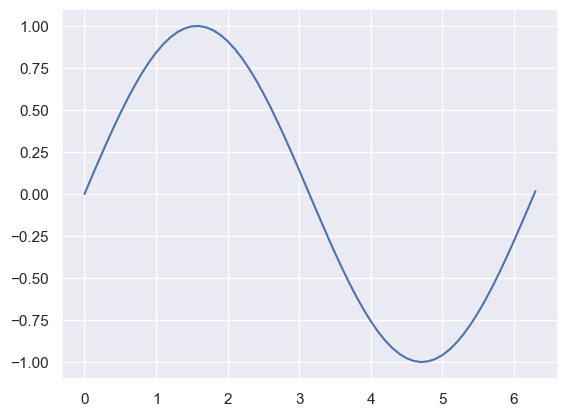

In [ ]:
## Generating Chart using Simple Data ################################
# generation data
# stop = 2 * pie (3.14), since sin is in radians (not deg)
x = np.arange(start=0, stop=2 * np.pi + 0.1, step=0.1)
y = np.sin(x)
# 1. Setting the theme (optional)
sns.set_theme(style="darkgrid")  # Options: darkgrid, whitegrid, dark, white

# 2. Plotting
sns.lineplot(x=x, y=y)


Text(0, 0.5, 'sin(x)')

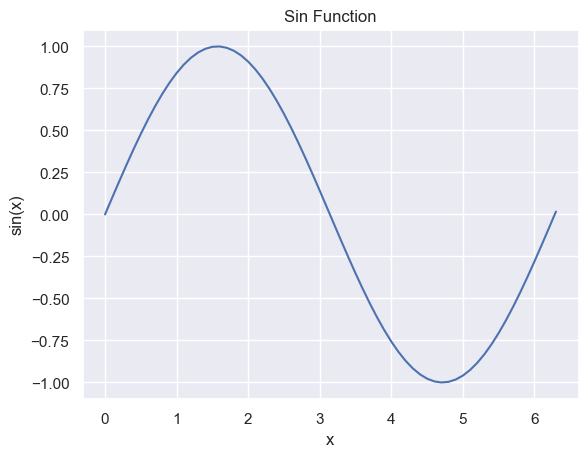

In [8]:
## Adding a bit of info to our diagram ###############################
sns.lineplot(x=x, y=y)

plt.title("Sin Function")
plt.xlabel("x")
plt.ylabel("sin(x)")


Text(0, 0.5, 'f(x)')

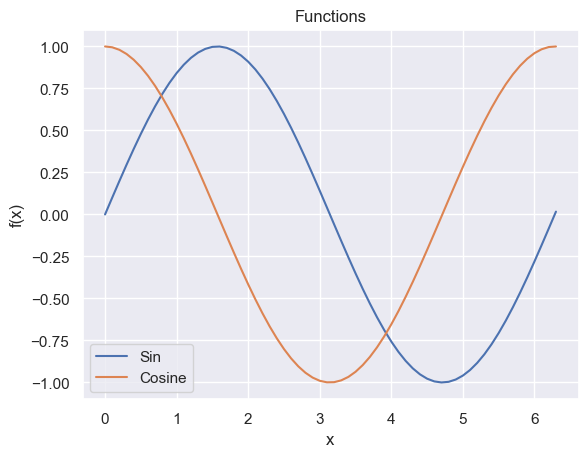

In [ ]:
## Plotting multiple values on the same Chart ########################
# generation data
# stop = 2 * pie (3.14), since sin is in radians (not deg)
x = np.arange(start=0, stop=2 * np.pi + 0.1, step=0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# 1. Plotting
sns.lineplot(x=x, y=y1, label="Sin")
sns.lineplot(x=x, y=y2, label="Cosine")

# 2. Adding Info
plt.title("Functions")
plt.xlabel("x")
plt.ylabel("f(x)")

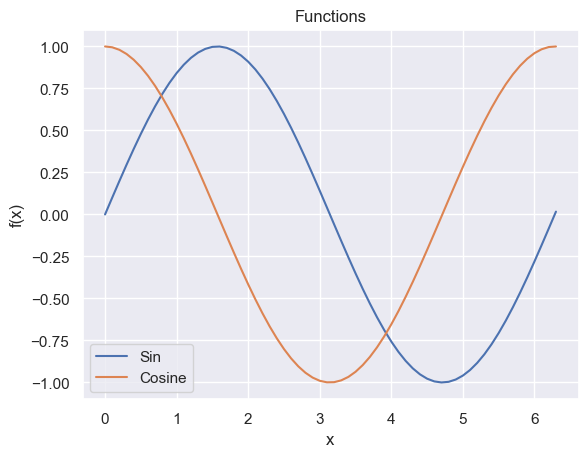

In [17]:
## Saving the plot ###################################################
# IMPORTANT NOTE: the output image MUST BE png (and not JPEG or...)
# If the type is not PNG, then the file will not be saved

sns.lineplot(x=x, y=y1, label="Sin")
sns.lineplot(x=x, y=y2, label="Cosine")

# 2. Adding Info
plt.title("Functions")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.savefig(OUT_PLOT_PATH)


### Plotting from Pandas

There are three methods plotting from pandas:

1. Using the data frame itself
1. Passing the whole data frame to seaborn
1. Passing x and y separately to seaborn

In [ ]:
df = pd.read_csv(
    INPUT_DATA_PATH, index_col="time", parse_dates=["time"], date_format="%Y%m%d:%H%M"
)
df

,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,
2018-12-31 23:49:00,0.00,0.00,0.00,0.00,10.84,2.41,0.0
2019-01-01 00:49:00,0.00,0.00,0.00,0.00,10.23,1.86,0.0
2019-01-01 01:49:00,0.00,0.00,0.00,0.00,10.43,1.38,0.0
2019-01-01 02:49:00,0.00,0.00,0.00,-1.70,9.94,1.45,0.0
2019-01-01 03:49:00,296.65,157.66,2.17,9.88,10.46,1.38,0.0
...,...,...,...,...,...,...,...
2020-12-31 18:49:00,0.00,0.00,0.00,0.00,5.85,3.86,0.0
2020-12-31 19:49:00,0.00,0.00,0.00,0.00,5.21,3.66,0.0
2020-12-31 20:49:00,0.00,0.00,0.00,0.00,4.68,3.59,0.0


Text(0.5, 1.0, 'Irradiation Values')

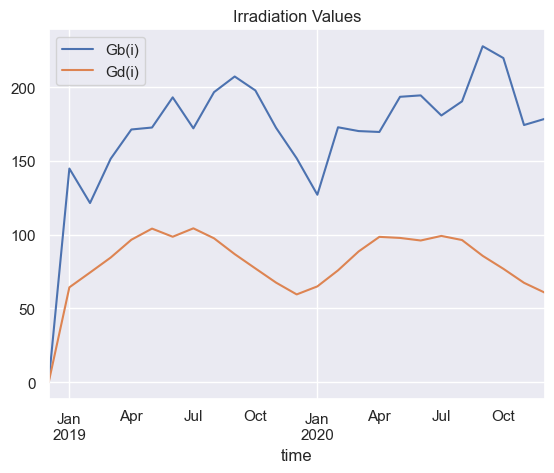

In [ ]:
## Method 1: Using the Data Frame ####################################
# This is the simplest method and in this method the labels are inferred from the data frame
# The `x` side is the index and the y is the columns you choose
df[["Gb(i)", "Gd(i)"]].resample("ME").mean().plot()

plt.title("Irradiation Values")

Text(0.5, 1.0, 'Irradiation Values')

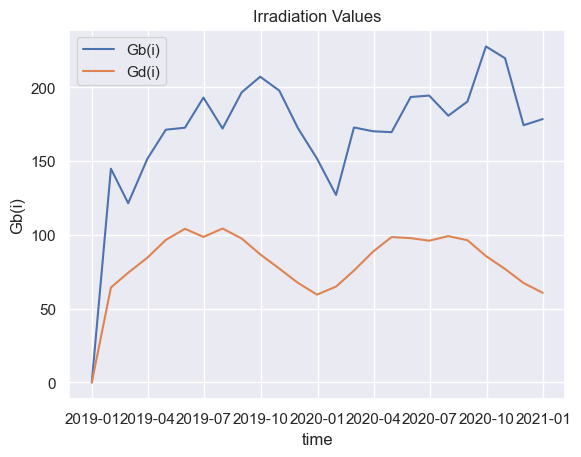

In [27]:
## Method 2: Passing the Data Frame to seaborn #######################
# This is also a good option, but notice the y label is only for the first plot and you have to change yourself
df_monthly = df.resample("ME").mean()
sns.lineplot(df_monthly, x="time", y="Gb(i)", label="Gb(i)")
sns.lineplot(df_monthly, x="time", y="Gd(i)", label="Gd(i)")
plt.title("Irradiation Values")

Text(0.5, 1.0, 'Irradiation Values')

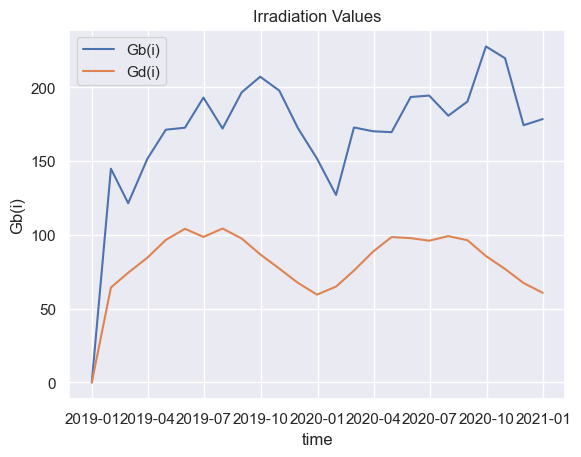

In [ ]:
## Method 3: Passing columns Separately ##############################
# This is also a good option, but notice the y label is only for the first plot and you have to change yourself
# Again, your y-label is only based on the first value and should be changed manually
df_monthly = df.resample("ME").mean()
sns.lineplot(df_monthly, x=df_monthly.index, y=df_monthly["Gb(i)"], label="Gb(i)")
sns.lineplot(df_monthly, x=df_monthly.index, y=df_monthly["Gd(i)"], label="Gd(i)")
plt.title("Irradiation Values")